# numpy로 이미지 데이터 다루기

In [2]:
# !pip install matplotlib koreanize-matplotlib

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd

# 이미지 불러오기

In [5]:
img = Image.open("./data/sample00.jpg")
img_arr = np.array(img)
print("배열 타입: ", type(img_arr))
print("배열 shape: ", img_arr.shape)
print("배열 데이터 타입: ", img_arr.dtype)
print("배열 차원: ", img_arr.ndim)

배열 타입:  <class 'numpy.ndarray'>
배열 shape:  (163, 310, 3)
배열 데이터 타입:  uint8
배열 차원:  3


In [8]:
img_data = pd.DataFrame(img_arr[:,:,1])
img_data

,0,1,2,3,4,5,6,7,8,9,...,300,301,302,303,304,305,306,307,308,309
0,163,164,166,168,170,172,174,175,175,175,...,78,74,69,67,55,53,49,45,43,43
1,163,164,166,168,170,172,174,175,175,175,...,76,72,67,65,56,53,49,46,44,44
2,164,164,167,168,171,172,174,175,175,175,...,73,69,65,63,58,55,51,47,45,45
3,164,165,167,169,171,173,175,176,175,175,...,71,68,62,61,58,56,52,48,46,46
4,165,165,168,169,172,173,175,176,175,175,...,71,68,62,61,59,57,53,49,47,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,21,21,21,21,20,20,19,19,20,21,...,82,82,82,82,81,81,81,81,81,81
159,21,21,21,21,20,20,19,19,20,21,...,82,82,81,81,81,81,81,81,81,81
160,21,21,21,21,21,21,21,21,21,21,...,73,74,75,75,76,76,76,76,77,77
161,22,22,22,22,22,22,22,22,22,22,...,71,72,73,73,73,74,74,74,75,75


In [11]:
img_data.to_csv("./data/img_data_00.csv", index=False, encoding="utf-8-sig")

# 이미지 조작하기

In [12]:
img = Image.open("./data/sample1.jpg")
img_arr = np.array(img)
print("배열 타입: ", type(img_arr))
print("배열 shape: ", img_arr.shape)
print("배열 데이터 타입: ", img_arr.dtype)
print("배열 차원: ", img_arr.ndim)

배열 타입:  <class 'numpy.ndarray'>
배열 shape:  (505, 1000, 3)
배열 데이터 타입:  uint8
배열 차원:  3


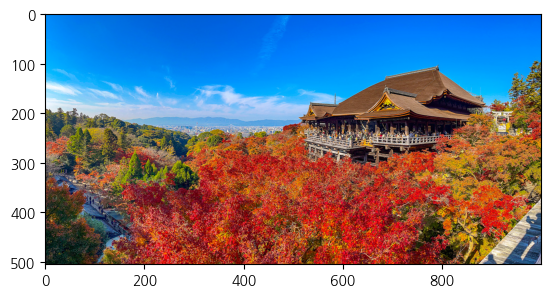

In [17]:
plt.imshow(img_arr)
# plt.axis('off')
plt.show()

In [20]:
h, w, c = img_arr.shape
print(f"높이{h}, 넓이:{w}, 채널{c}")

높이505, 넓이:1000, 채널3


# 슬라이싱을 이용해서 이미지에서 일부분 잘라오기

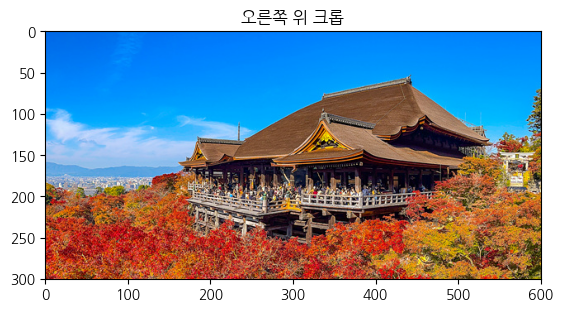

In [21]:
crop = img_arr[50:351, 350:951]
plt.imshow(crop)
plt.title('오른쪽 위 크롭')
plt.show()

# 이미지의 채널 별로 따로 출력하기

In [22]:
# RGB 채널 분리
R = img_arr[:,:,0]
G = img_arr[:,:,1]
B = img_arr[:,:,2]

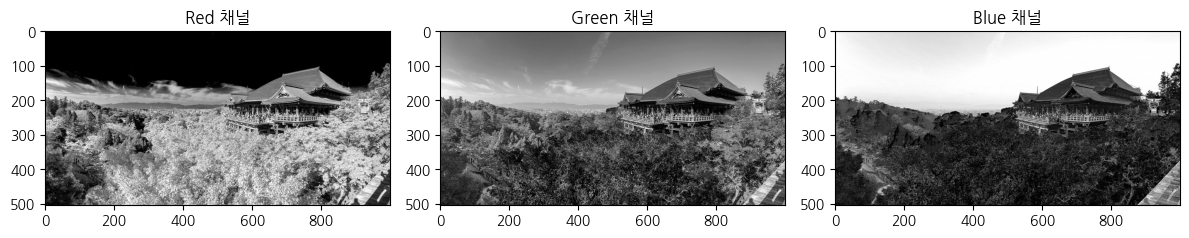

In [26]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(R, cmap='gray'); plt.title("Red 채널")
plt.subplot(1,3,2); plt.imshow(G, cmap='gray'); plt.title("Green 채널")
plt.subplot(1,3,3); plt.imshow(B, cmap='gray'); plt.title("Blue 채널")
plt.tight_layout()
plt.show()

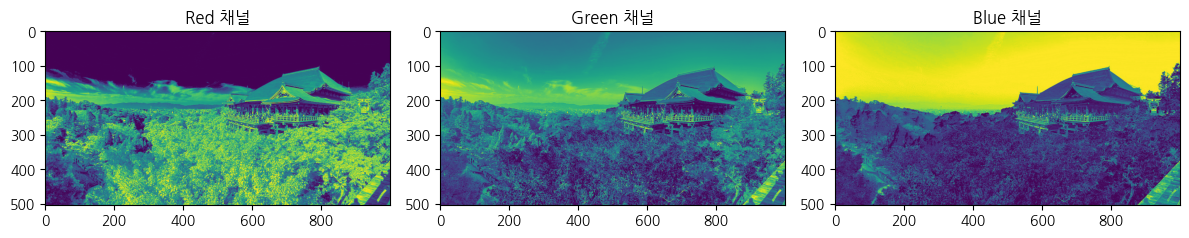

In [27]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(R); plt.title("Red 채널")
plt.subplot(1,3,2); plt.imshow(G); plt.title("Green 채널")
plt.subplot(1,3,3); plt.imshow(B); plt.title("Blue 채널")
plt.tight_layout()
plt.show()

# 브로드 캐스팅 연산으로 컬러를 흑백으로 바꾸기

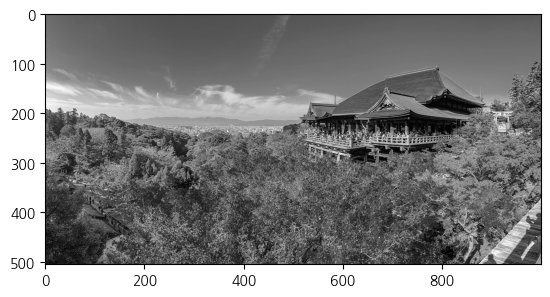

In [28]:
gray_arr = (R * 0.299 + G * 0.587 + B * 0.114).astype(np.uint8)
plt.imshow(gray_arr, cmap='gray')
plt.show()

# 브로드 캐스팅 연산으로 이미지 밝기/대비 조절하기

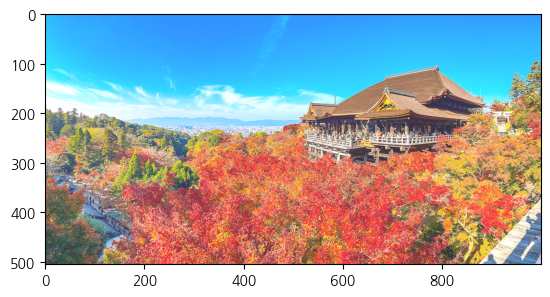

In [30]:
# 밝기 만들기 + 50
brighter = img_arr.astype(np.int16) + 50
brighter = np.clip(brighter, 0, 255).astype(np.uint8)
plt.imshow(brighter)
plt.show()

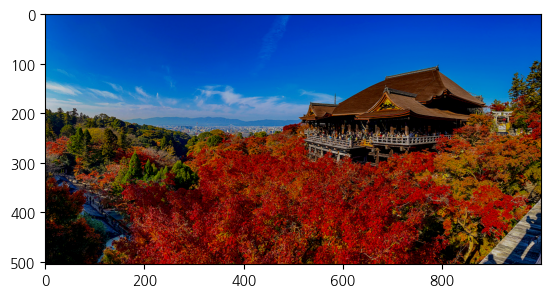

In [31]:
# 어둡게 만들기 - 50
brighter = img_arr.astype(np.int16) - 50
brighter = np.clip(brighter, 0, 255).astype(np.uint8)
plt.imshow(brighter)
plt.show()

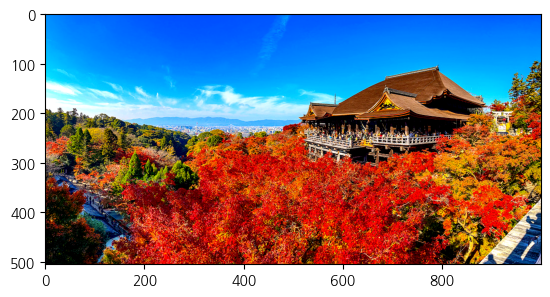

In [32]:
# 대비(contrast) 조절
alpha = 1.5 # 1보다 크면 대비 올림
contrast = (img_arr.astype(np.float32) - 128) * alpha + 128
contrast = np.clip(contrast, 0, 255).astype(np.uint8)
plt.imshow(contrast)
plt.show()